# Agent Decision

Before starting, we need to load these files:
- agent_wieghts.pth
- progcen_wrappers
- agent.py

In [ ]:
!pip install procgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.7/267.7 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: imageio-ffmpeg
    Found existing installation: imageio-ffmpeg 0.4.9
    Uninstalling imageio-ffmpeg-0.4.9:
      Successfully uninstalled imageio-ffmpeg-0.4.9


In [ ]:
import torch
from procgen import ProcgenEnv
from procgen_wrappers import VecExtractDictObs, TransposeFrame, ScaledFloatFrame

env = ProcgenEnv(
        num_envs=1,
        env_name="fruitbot",
        start_level=0,
        num_levels=100,
        distribution_mode='easy',
    )

env = VecExtractDictObs(env, "rgb")
env = TransposeFrame(env)
env = ScaledFloatFrame(env)

In [ ]:
from agent import Agent
import torch

agent = Agent()
agent.load_state_dict(torch.load('agent_weights.pth'))
agent.eval()

Agent(
  (features): ImpalaModel(
    (block1): ImpalaBlock(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (res1): ResidualBlock(
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (res2): ResidualBlock(
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (block2): ImpalaBlock(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (res1): ResidualBlock(
        (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(32, 32, kernel_size=(

# Use the agent for playing the game

In [ ]:
obs = env.reset()

# Déplacez le modèle sur le périphérique CUDA
agent = agent.to('cuda')

while True:
    obs = torch.FloatTensor(obs).to('cuda')
    action = agent(obs).argmax(1).cpu().numpy()
    obs, _, done, _ = env.step(action)
    if done[0]:
        break
env.close()

In [ ]:
obs = env.reset()
print("Observation initiale:", obs)
agent = agent.to('cuda')
print("Modèle déplacé sur CUDA.")
while True:
    obs = torch.FloatTensor(obs).to('cuda')
    print("Observation après conversion:", obs)
    action = agent(obs).argmax(1).cpu().numpy()
    print("Action choisie par le modèle:", action)
    obs, _, done, _ = env.step(action)
    print("Observation après étape d'environnement:", obs)
    if done[0]:
        print("Fin de l'épisode.")
        break
env.close()
print("Environnement fermé.")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
          [0.5725, 0.5961, 0.7020,  ..., 0.5608, 0.5961, 0.6471],
          ...,
          [0.5961, 0.6118, 0.6275,  ..., 0.5451, 0.5804, 0.5882],
          [0.6157, 0.6157, 0.5961,  ..., 0.5922, 0.6118, 0.5961],
          [0.6196, 0.6235, 0.6745,  ..., 0.6157, 0.5922, 0.6471]]]],
       device='cuda:0')
Action choisie par le modèle: [14]
Observation après étape d'environnement: [[[[0.12156863 0.12941176 0.1372549  ... 0.11764706 0.10980392
    0.13333333]
   [0.11372549 0.14901961 0.14117647 ... 0.10588235 0.13333333
    0.12156863]
   [0.12156863 0.1254902  0.12156863 ... 0.12156863 0.12156863
    0.1254902 ]
   ...
   [0.1372549  0.1372549  0.16078431 ... 0.1372549  0.14509804
    0.14117647]
   [0.14901961 0.15294118 0.16470588 ... 0.1372549  0.14901961
    0.15294118]
   [0.14901961 0.14509804 0.14509804 ... 0.1372549  0.14509804
    0.14117647]]

  [[0.36862745 0.39607843 0.41568627 ... 0.38823529 0.356

# Original GIF

/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py:390: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


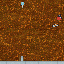

In [ ]:
import imageio
from IPython.display import Image
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

def obs_to_image(obs):
  return (obs[0].transpose(1,2,0) * 255).astype(np.uint8)

def display_trajectory(frames, fps=25):
  imageio.mimwrite('./tmp.gif',
                [obs_to_image(frame) for i, frame in enumerate(frames)],
                fps=fps)
  return(Image(open('tmp.gif','rb').read(), width=500, height=500))

frames = []
obs = env.reset()

while True:
    frames.append(obs)
    obs = torch.FloatTensor(obs).to('cuda')
    action = agent(obs).argmax(1).cpu().numpy()
    obs, _, done ,_ = env.step(action)
    img = env.render()
    if done[0]:
        break

env.close()

display_trajectory(frames)

# Integrated gradients

In [ ]:
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00


The code uses the "Integrated Gradients" method to explain the importance of different parts of an image sequence in model decisions. The aim is to visually understand which areas of the image have the greatest influence on model predictions. Integrated Gradients assigns importance values to each image pixel, measuring their contribution to the model's decision. The process simulates the model's interaction with its environment, recording observations and actions. The display_trajectory function generates a sequence of images with integrated saliency maps, offering a detailed explanation of the most influential areas along the trajectory.

Generating Saliency Maps:   0%|          | 0/223 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py:390: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


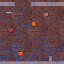

In [ ]:
import imageio
from IPython.display import Image
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch
from captum.attr import IntegratedGradients

def obs_to_image(obs, saliency=None):
    image = (obs[0].transpose(1, 2, 0) * 255).astype(np.uint8)

    if saliency is not None:
        saliency = cv2.resize(saliency, (image.shape[1], image.shape[0]))
        saliency = (saliency * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(saliency, cv2.COLORMAP_JET)
        image_with_saliency = cv2.addWeighted(image, 0.7, heatmap, 0.3, 0)
    else:
        image_with_saliency = image

    return image_with_saliency

def compute_integrated_gradients(model, input_tensor, target_class=None, num_steps=50):
    integrated_gradients = IntegratedGradients(model)

    # Convert target_class to a PyTorch tensor
    target_class = torch.tensor(target_class, dtype=torch.long).to(input_tensor.device)

    attributions = integrated_gradients.attribute(input_tensor, target=target_class, n_steps=num_steps)
    saliency_map = attributions.sum(dim=1).squeeze().cpu().numpy()
    return saliency_map

def display_trajectory(frames, fps=25):
    saliency_maps = []

    for frame in tqdm(frames, desc='Generating Saliency Maps'):
        obs_tensor = torch.FloatTensor(frame).to('cuda')
        action = agent(obs_tensor).argmax(1).cpu().numpy()

        # Assuming target_class is the predicted class, modify accordingly
        target_class = action[0]

        saliency_map = compute_integrated_gradients(agent, obs_tensor, target_class=target_class)
        saliency_maps.append(saliency_map)

    images = [obs_to_image(frame, saliency) for frame, saliency in zip(frames, saliency_maps)]
    imageio.mimwrite('./tmp.gif', images, fps=fps)
    return Image(open('tmp.gif', 'rb').read(), width=500, height=500)

frames = []
obs = env.reset()

while True:
    frames.append(obs)
    obs = torch.FloatTensor(obs).to('cuda')
    action = agent(obs).argmax(1).cpu().numpy()
    obs, _, done, _ = env.step(action)
    img = env.render()
    if done[0]:
        break

env.close()

display_trajectory(frames)


# Random saliency Map

The aim of this script is to create a saliency map to explain the influential parts of the images in a model's decisions. The obs_to_image function merges the observation with a saliency map, if provided. The compute_saliency_map method generates a random saliency map. The display_trajectory_saliency function uses this map to generate a sequence of images explaining areas of saliency along a simulated trajectory.

In [ ]:
import imageio
from IPython.display import Image
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import cv2

def obs_to_image(obs, saliency=None):
    image = (obs[0].transpose(1, 2, 0) * 255).astype(np.uint8)

    if saliency is not None:
        saliency = cv2.resize(saliency, (image.shape[1], image.shape[0]))
        saliency = (saliency * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(saliency, cv2.COLORMAP_JET)
        image_with_saliency = cv2.addWeighted(image, 0.7, heatmap, 0.3, 0)
    else:
        image_with_saliency = image

    return image_with_saliency

def compute_saliency_map(obs):
    return np.random.rand(obs.shape[1], obs.shape[2])

def display_trajectory_saliency(frames, fps=25):
    saliency_maps = [compute_saliency_map(frame) for frame in frames]
    images = [obs_to_image(frame, saliency) for frame, saliency in zip(frames, saliency_maps)]
    imageio.mimwrite('./tmp.gif', images, fps=fps)
    return Image(open('tmp.gif', 'rb').read(), width=500, height=500)

frames = []
obs = env.reset()

while True:
    frames.append(obs)
    obs = torch.FloatTensor(obs).to('cuda')
    action = agent(obs).argmax(1).cpu().numpy()
    obs, _, done, _ = env.step(action)
    img = env.render()
    if done[0]:
        break

env.close()
display_trajectory_saliency(frames)


Output hidden; open in https://colab.research.google.com to view.

# Saliency Based on Backpropagation gradient

The objective of this script is to generate a saliency map, explaining influential regions of the images that impact the model's decisions. The obs_to_image function combines the observation with a saliency map if available. The compute_gradients method calculates the gradients with respect to the input, and the display_trajectory function utilizes these gradients to produce a sequence of images highlighting salient regions throughout a simulated trajectory.

Generating Saliency Maps:   0%|          | 0/94 [00:00<?, ?it/s]

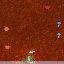

In [ ]:
import imageio
from IPython.display import Image
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch

def obs_to_image(obs, saliency=None):
    image = (obs[0].transpose(1, 2, 0) * 255).astype(np.uint8)

    if saliency is not None:
        saliency = cv2.resize(saliency, (image.shape[1], image.shape[0]))
        saliency = (saliency * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(saliency, cv2.COLORMAP_JET)
        image_with_saliency = cv2.addWeighted(image, 0.7, heatmap, 0.3, 0)
    else:
        image_with_saliency = image

    return image_with_saliency

def compute_gradients(model, input_tensor):
    input_tensor.requires_grad_()
    output = model(input_tensor)
    target = torch.zeros_like(output)
    target[0, output.argmax()] = 1  # Set the element corresponding to the predicted class to 1
    output.backward(target)
    gradients = input_tensor.grad.squeeze().cpu().numpy()
    return gradients

def display_trajectory(frames, fps=25):
    saliency_maps = []

    for frame in tqdm(frames, desc='Generating Saliency Maps'):
        obs_tensor = torch.FloatTensor(frame).to('cuda')
        gradients = compute_gradients(agent, obs_tensor)
        saliency_map = np.abs(gradients).max(axis=0)  # Use the max gradient across channels as the saliency map
        saliency_maps.append(saliency_map)

    images = [obs_to_image(frame, saliency) for frame, saliency in zip(frames, saliency_maps)]
    imageio.mimwrite('./tmp.gif', images, fps=fps)
    return Image(open('tmp.gif', 'rb').read(), width=500, height=500)

frames = []
obs = env.reset()

while True:
    frames.append(obs)
    obs = torch.FloatTensor(obs).to('cuda')
    action = agent(obs).argmax(1).cpu().numpy()
    obs, _, done, _ = env.step(action)
    img = env.render()
    if done[0]:
        break

env.close()

display_trajectory(frames)


# Layer-wise Relevance Propagation

This script uses the LRP method to generate saliency maps and explain influential image areas in model decisions. The obs_to_image function combines the observation with a saliency map, if provided. The compute_lrp method uses LRP to assign importance values to image pixels, measuring their contribution to the model decision. The display_trajectory_with_lrp function uses these LRP saliency maps to generate a sequence of images explaining the saliency zones along a simulated trajectory. The model used is a pre-trained version of ResNet50, and the script can be adapted to work with other pre-trained models. LRP reinforces the transparency of the model by precisely identifying the parts of the images that have the greatest impact on its predictions.

Generating LRP Saliency Maps:   0%|          | 0/72 [00:00<?, ?it/s]

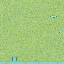

In [ ]:
import imageio
from IPython.display import Image
from tqdm.notebook import tqdm
import numpy as np
import torch
import cv2
from torchvision import models
from captum.attr import LayerLRP

def obs_to_image(obs, saliency=None):
    image = (obs[0].transpose(1, 2, 0) * 255).astype(np.uint8)

    if saliency is not None:
        saliency = cv2.resize(saliency, (image.shape[1], image.shape[0]))
        saliency = (saliency * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(saliency, cv2.COLORMAP_JET)
        image_with_saliency = cv2.addWeighted(image, 0.7, heatmap, 0.3, 0)
    else:
        image_with_saliency = image

    return image_with_saliency

def compute_lrp(model, input_tensor, target_class=None, target_layer=None):
    model.eval()  # Ensure the model is in evaluation mode
    model.to(input_tensor.device)  # Move the model to the correct device

    if target_layer is None:
        target_layer = model.fc  # Assuming the final fully connected layer
        if target_layer is None:
            raise ValueError("Model does not have a valid final fully connected layer (fc).")

    lrp = LayerLRP(model, target_layer)

    # Convert target_class to a PyTorch tensor
    target_class = torch.tensor(target_class, dtype=torch.long).to(input_tensor.device)

    attributions = lrp.attribute(input_tensor, target=target_class)
    saliency_map = attributions.sum(dim=1).squeeze().detach().cpu().numpy()
    return saliency_map

def display_trajectory_with_lrp(frames, model, fps=25):
    saliency_maps = []

    for frame in tqdm(frames, desc='Generating LRP Saliency Maps'):
        obs_tensor = torch.FloatTensor(frame).to('cuda')
        action = model(obs_tensor).argmax(1).cpu().numpy()

        # Assuming target_class is the predicted class, modify accordingly
        target_class = action[0]

        lrp_saliency_map = compute_lrp(model, obs_tensor, target_class=target_class)
        saliency_maps.append(lrp_saliency_map)

    images = [obs_to_image(frame, saliency) for frame, saliency in zip(frames, saliency_maps)]
    imageio.mimwrite('./tmp.gif', images, fps=fps)
    return Image(open('tmp.gif', 'rb').read(), width=500, height=500)

# Use a pre-trained model (e.g., ResNet50)
pretrained_model = models.resnet50(pretrained=True)
pretrained_model.to('cuda')

# Assuming you have a pre-trained model named 'agent'
frames = []
obs = env.reset()

while True:
    frames.append(obs)
    obs = torch.FloatTensor(obs).to('cuda')
    action = agent(obs).argmax(1).cpu().numpy()
    obs, _, done, _ = env.step(action)
    img = env.render()
    if done[0]:
        break

env.close()

display_trajectory_with_lrp(frames, pretrained_model)
